# Imports

##### General imports

In [186]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("../")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [187]:
import networkx as nx

##### Import from flatland environment 

In [188]:
from flatland.envs.rail_env import RailEnv
from flatland.envs.observations import *
from flatland.envs.rail_generators import complex_rail_generator,rail_from_manual_specifications_generator,random_rail_generator, RailGenerator
from flatland.envs.schedule_generators import complex_schedule_generator, random_schedule_generator, ScheduleGenerator
from flatland.utils.rendertools import RenderTool

##### Import from our framework

In [190]:
from src.graph import NetworkGraph
from src.flows import TimeNetwork

In [192]:
from src.flows import MCFlow

# Test of time expanded network

##### Create a flatland network

In [328]:
number_agents = 3

size_side = 10
env = RailEnv(width=size_side,
              height=size_side,
              rail_generator=complex_rail_generator(nr_start_goal=10, nr_extra=1, 
                                                    min_dist=6, max_dist=99999, 
                                                    seed = np.random.randint(0,2000)),
              schedule_generator=complex_schedule_generator(),
              number_of_agents=number_agents,
              obs_builder_object=GlobalObsForRailEnv())

env.reset()
matrix_rail = np.array(env.rail.grid.tolist())
flatlandNetwork = NetworkGraph(matrix_rail,[(0,1)],[(1,0)])

cycles detected in NetworkGraph, this may be due to the fact that endpoint can be used to do 180 turn


/home/charles/anaconda3/envs/flatland-rl/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/charles/anaconda3/envs/flatland-rl/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


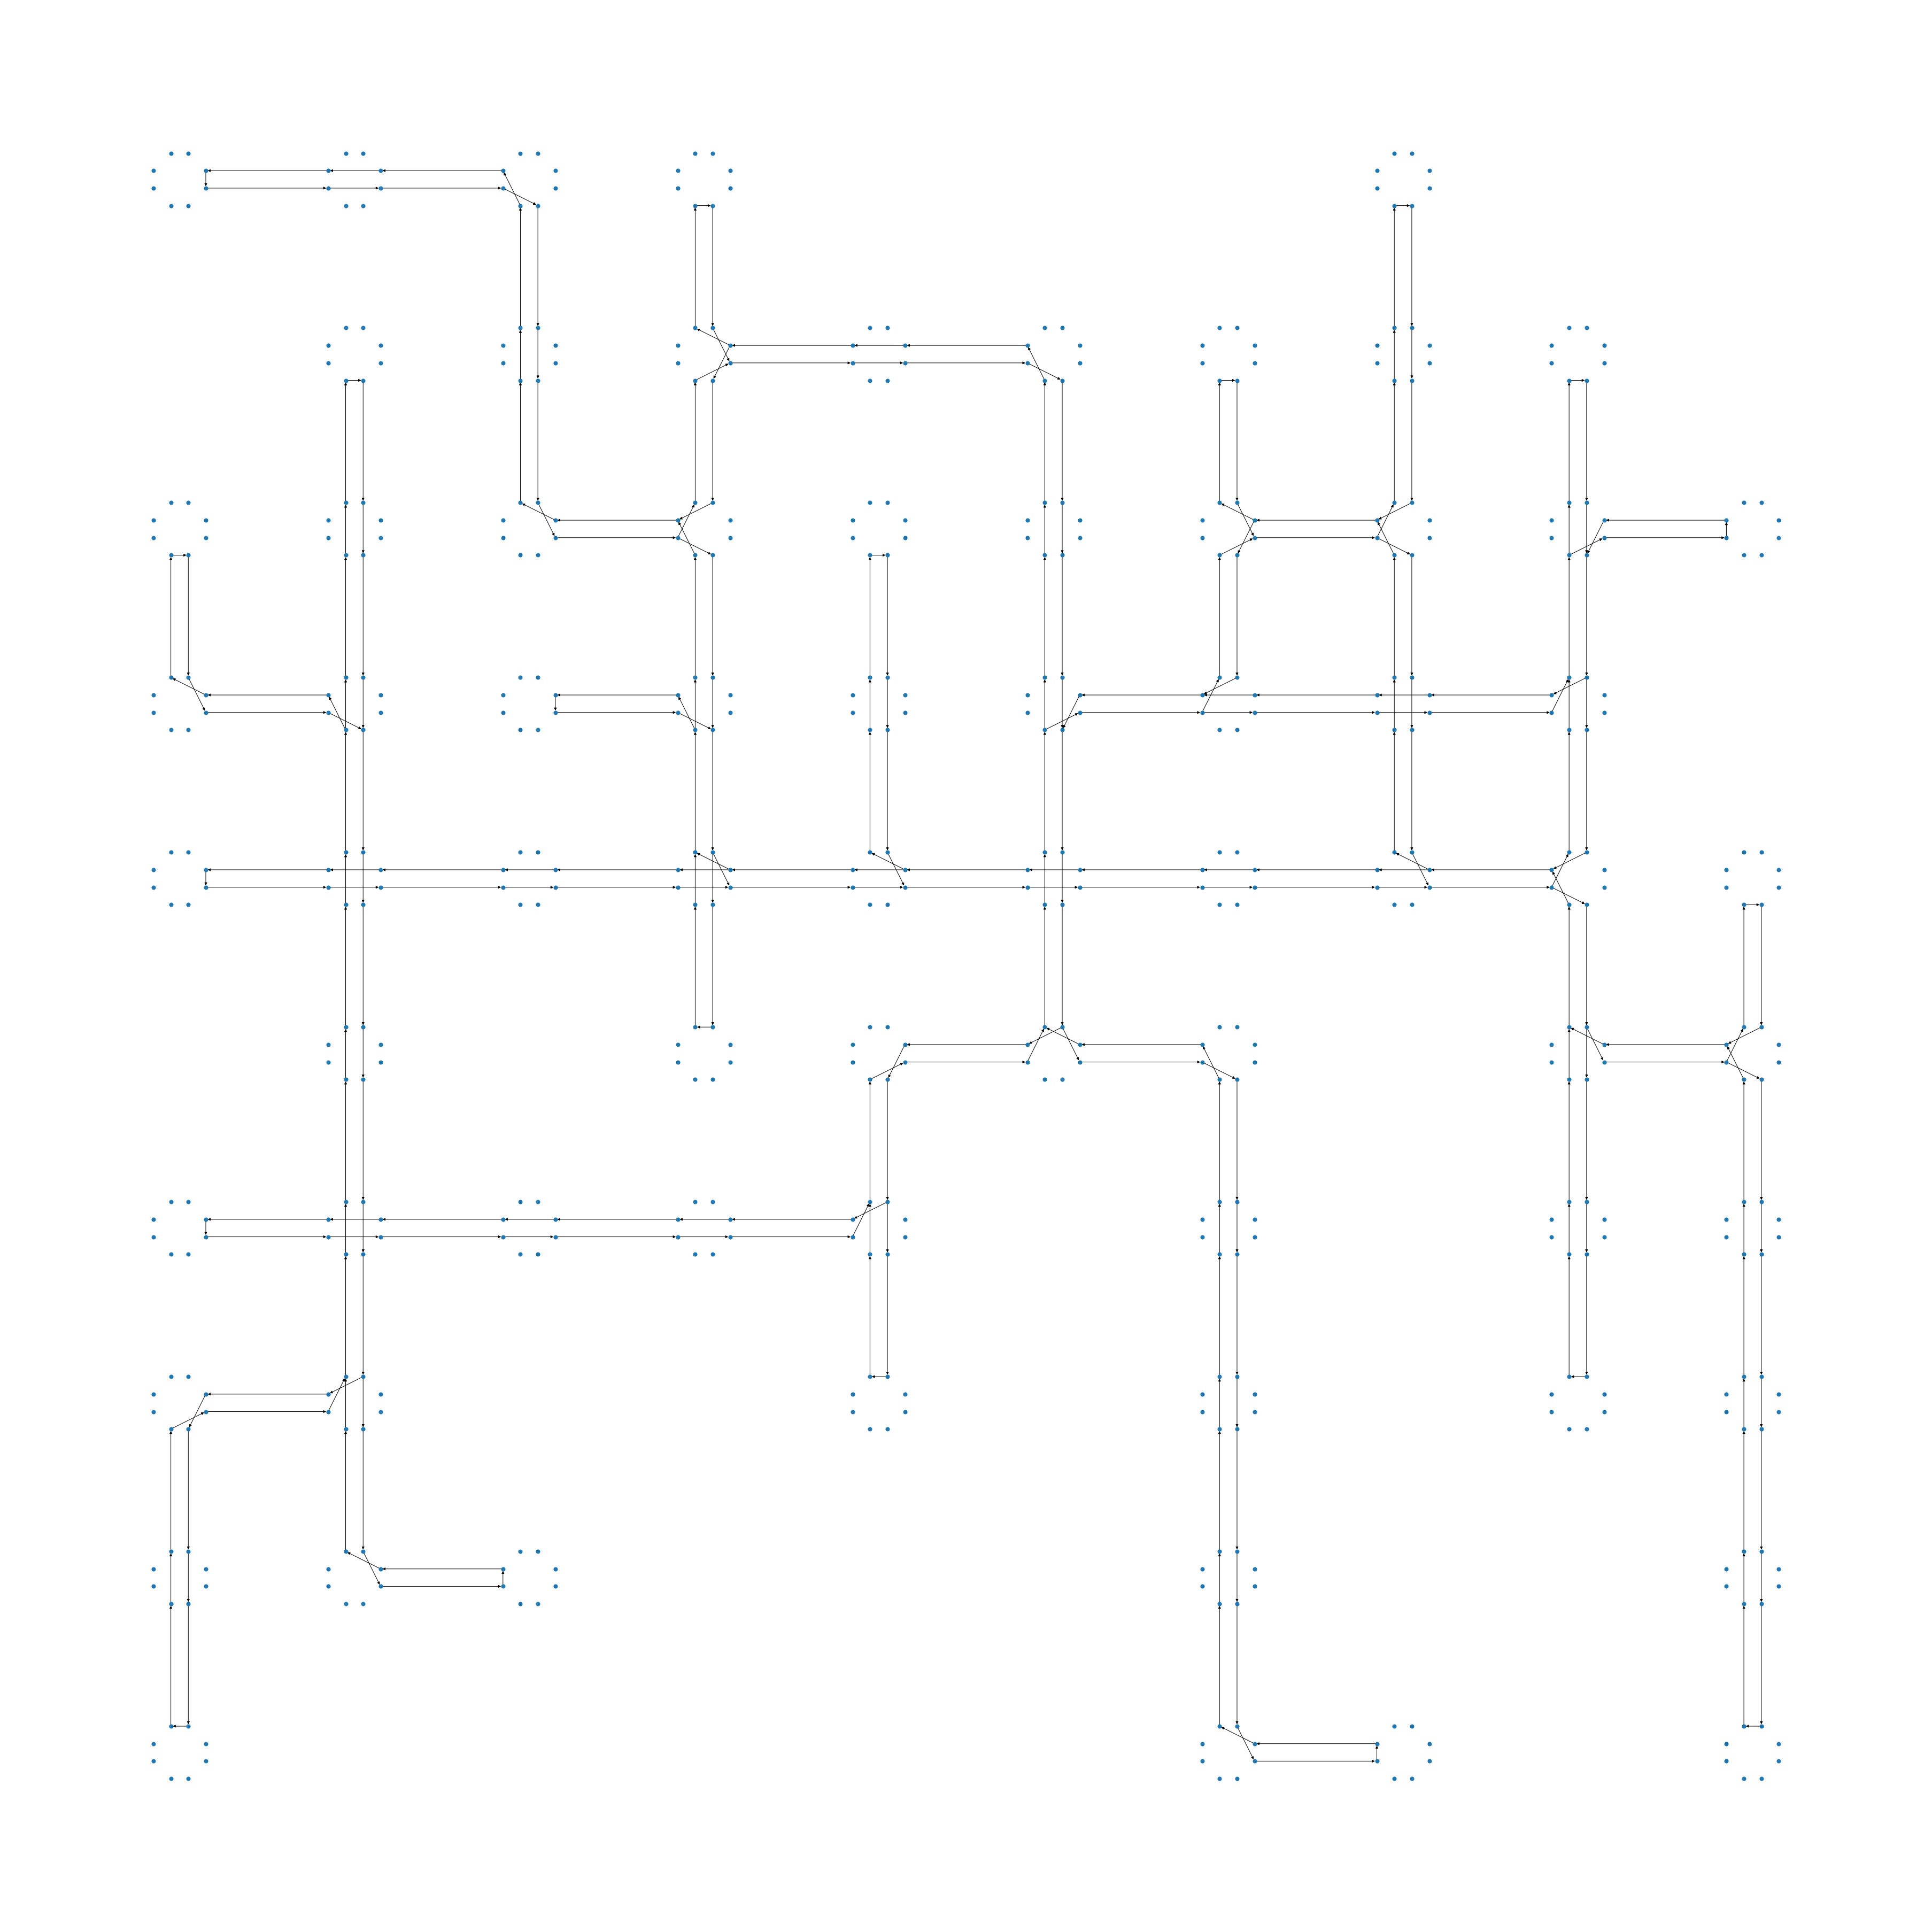

In [329]:
flatlandNetwork.show(jitter=0.1)

##### create a time expanded network

In [78]:
import time


In [337]:
start = time.time()
TestNetworkTime = TimeNetwork(flatlandNetwork, depth=60)
stop = time.time()
print(f'time taken to build the graph: {stop-start}')

time taken to build the graph: 0.6537797451019287


In [ ]:
TestNetworkTime.show()

In [338]:
TestNetworkTime.connect_sources_and_sink([(9,9),(0,0)],[(3,2),(9,6)])

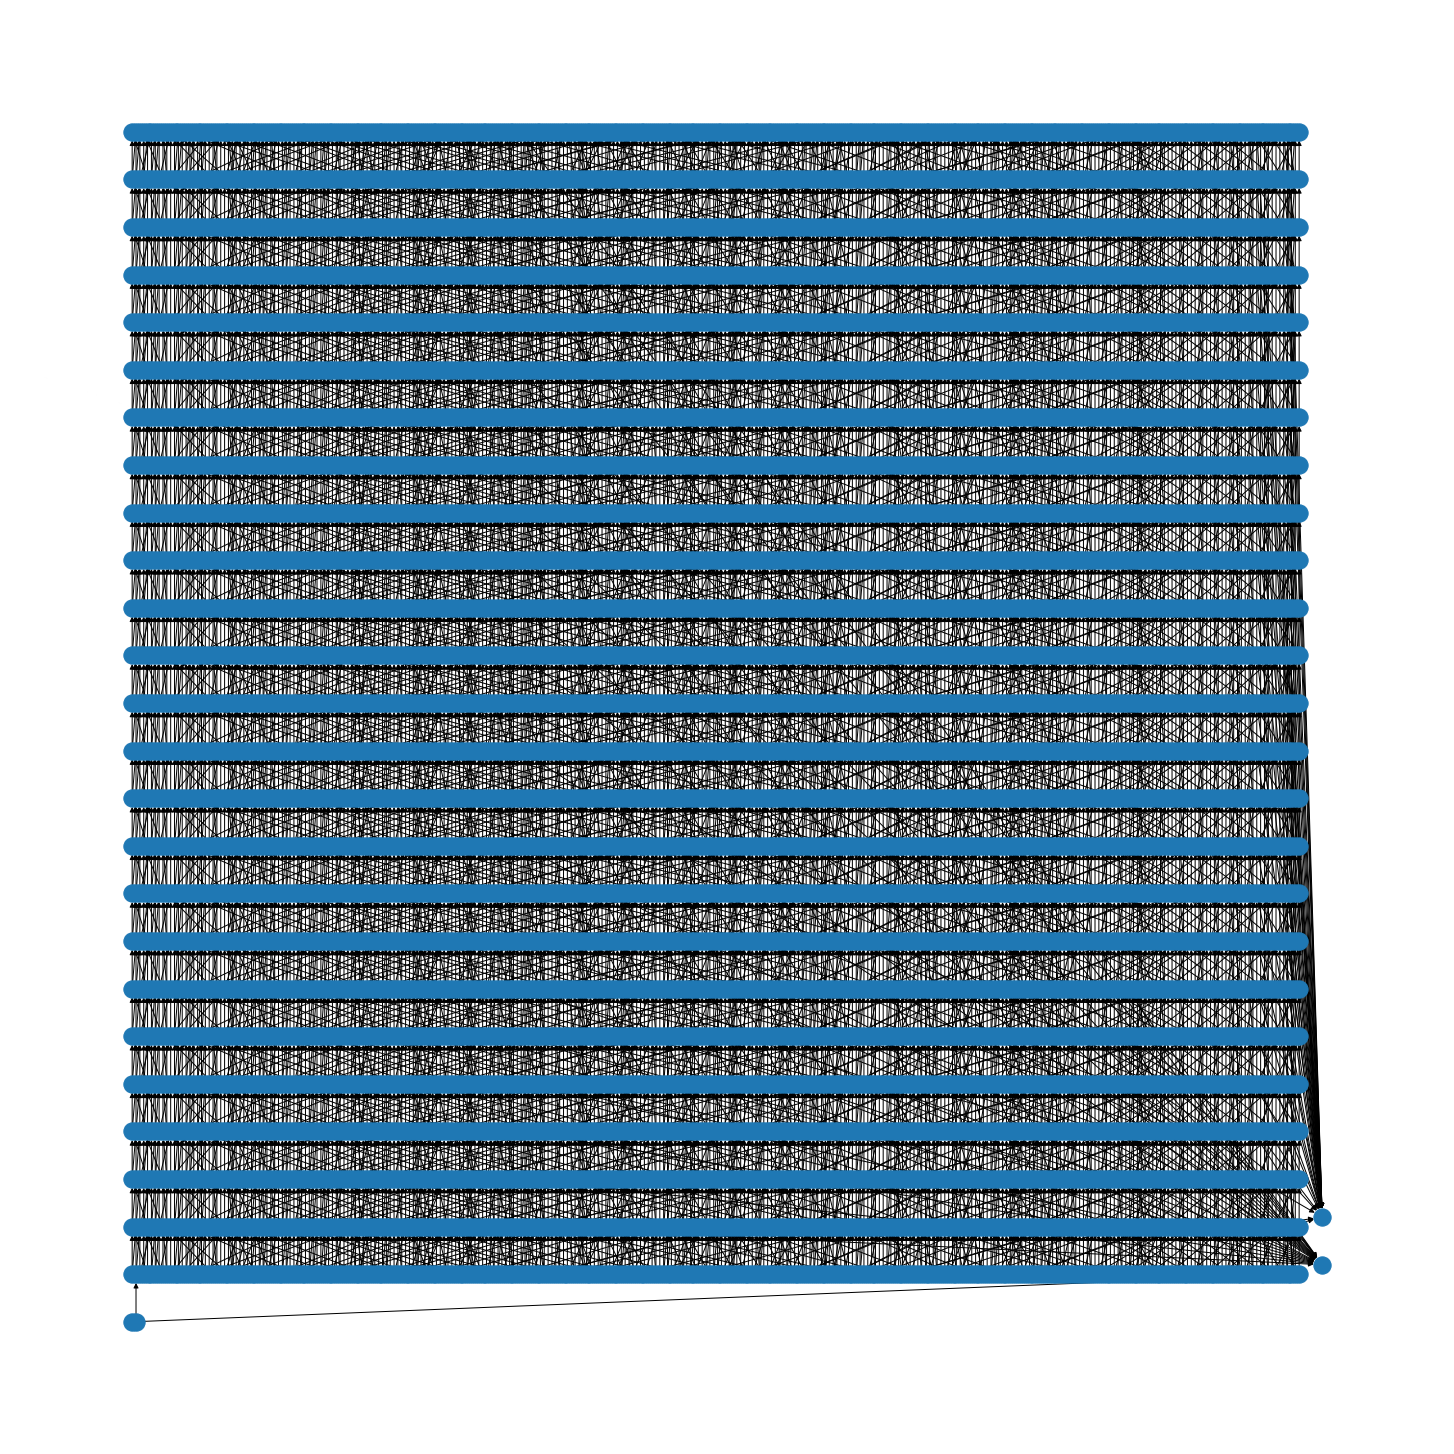

In [334]:
TestNetworkTime.show()

##### Test LP Formulation

test a simple graph

In [304]:
g = nx.DiGraph()
g.add_edge('0','1',weight = 1, capacity = 1)
g.add_edge('1','2', weight = 1, capacity = 1)
g.add_edge('2','3', weight = 1, capacity = 1)
g.add_edge('4','2', weight = 1, capacity = 1)
g.add_edge('3','1', weight = 1, capacity = 1)
g.add_edge("source_agent_0",'0',weight = 0,capacity = 1)
g.add_edge("source_agent_1",'4', weight = 0, capacity = 1)
g.add_edge('2',"sink_agent_0", weight = 0, capacity = 1)
g.add_edge('3',"sink_agent_1", weight = 0, capacity = 1)

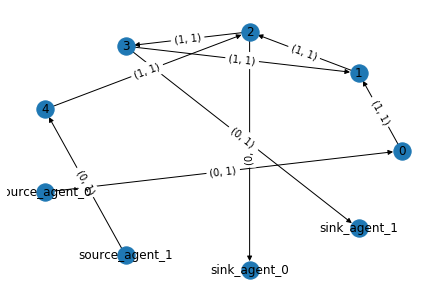

In [305]:
pos = nx.circular_layout(g)
weights = nx.get_edge_attributes(g,'weight')
capacities = nx.get_edge_attributes(g,'capacity')
labels = {}
for key in weights.keys():
    labels[key] = (weights[key],capacities[key])
nx.draw(g,pos,with_labels = True)
_ = nx.draw_networkx_edge_labels(g,pos, edge_labels=labels)

In [345]:
for small_set in TestNetworkTime.topology:
    print(small_set)
    print("\n")

{'(0, 0)_E_in_t0', '(0, 0)_E_out_t0'}


{'(0, 0)_E_out_t1', '(0, 0)_E_in_t1'}


{'(0, 0)_E_in_t2', '(0, 0)_E_out_t2'}


{'(0, 0)_E_in_t3', '(0, 0)_E_out_t3'}


{'(0, 0)_E_in_t4', '(0, 0)_E_out_t4'}


{'(0, 0)_E_in_t5', '(0, 0)_E_out_t5'}


{'(0, 0)_E_out_t6', '(0, 0)_E_in_t6'}


{'(0, 0)_E_out_t7', '(0, 0)_E_in_t7'}


{'(0, 0)_E_in_t8', '(0, 0)_E_out_t8'}


{'(0, 0)_E_in_t9', '(0, 0)_E_out_t9'}


{'(0, 0)_E_in_t10', '(0, 0)_E_out_t10'}


{'(0, 0)_E_out_t11', '(0, 0)_E_in_t11'}


{'(0, 0)_E_out_t12', '(0, 0)_E_in_t12'}


{'(0, 0)_E_out_t13', '(0, 0)_E_in_t13'}


{'(0, 0)_E_out_t14', '(0, 0)_E_in_t14'}


{'(0, 0)_E_out_t15', '(0, 0)_E_in_t15'}


{'(0, 0)_E_in_t16', '(0, 0)_E_out_t16'}


{'(0, 0)_E_out_t17', '(0, 0)_E_in_t17'}


{'(0, 0)_E_out_t18', '(0, 0)_E_in_t18'}


{'(0, 0)_E_in_t19', '(0, 0)_E_out_t19'}


{'(0, 0)_E_out_t20', '(0, 0)_E_in_t20'}


{'(0, 0)_E_in_t21', '(0, 0)_E_out_t21'}


{'(0, 0)_E_in_t22', '(0, 0)_E_out_t22'}


{'(0, 0)_E_in_t23', '(0, 0)_E_out_t23'}


{'(0, 0)_E_o


{'(4, 1)_N_out_t32', '(4, 1)_E_out_t32', '(4, 1)_E_in_t32', '(4, 1)_S_out_t32', '(4, 1)_W_out_t32', '(4, 1)_W_in_t32', '(4, 1)_S_in_t32', '(4, 1)_N_in_t32'}


{'(4, 1)_W_out_t33', '(4, 1)_E_out_t33', '(4, 1)_N_out_t33', '(4, 1)_N_in_t33', '(4, 1)_E_in_t33', '(4, 1)_S_in_t33', '(4, 1)_S_out_t33', '(4, 1)_W_in_t33'}


{'(4, 1)_E_out_t34', '(4, 1)_N_out_t34', '(4, 1)_S_out_t34', '(4, 1)_N_in_t34', '(4, 1)_E_in_t34', '(4, 1)_W_in_t34', '(4, 1)_W_out_t34', '(4, 1)_S_in_t34'}


{'(4, 1)_E_out_t35', '(4, 1)_W_in_t35', '(4, 1)_N_in_t35', '(4, 1)_W_out_t35', '(4, 1)_S_out_t35', '(4, 1)_N_out_t35', '(4, 1)_S_in_t35', '(4, 1)_E_in_t35'}


{'(4, 1)_E_in_t36', '(4, 1)_N_out_t36', '(4, 1)_W_out_t36', '(4, 1)_S_out_t36', '(4, 1)_W_in_t36', '(4, 1)_N_in_t36', '(4, 1)_S_in_t36', '(4, 1)_E_out_t36'}


{'(4, 1)_W_out_t37', '(4, 1)_S_out_t37', '(4, 1)_E_in_t37', '(4, 1)_N_out_t37', '(4, 1)_E_out_t37', '(4, 1)_W_in_t37', '(4, 1)_S_in_t37', '(4, 1)_N_in_t37'}


{'(4, 1)_E_out_t38', '(4, 1)_S_in_t38', '(4, 

{'(6, 3)_E_in_t26', '(6, 3)_W_out_t26', '(6, 3)_W_in_t26', '(6, 3)_E_out_t26'}


{'(6, 3)_E_out_t27', '(6, 3)_W_out_t27', '(6, 3)_W_in_t27', '(6, 3)_E_in_t27'}


{'(6, 3)_E_out_t28', '(6, 3)_W_out_t28', '(6, 3)_E_in_t28', '(6, 3)_W_in_t28'}


{'(6, 3)_E_in_t29', '(6, 3)_E_out_t29', '(6, 3)_W_out_t29', '(6, 3)_W_in_t29'}


{'(6, 3)_E_out_t30', '(6, 3)_E_in_t30', '(6, 3)_W_in_t30', '(6, 3)_W_out_t30'}


{'(6, 3)_W_in_t31', '(6, 3)_E_out_t31', '(6, 3)_E_in_t31', '(6, 3)_W_out_t31'}


{'(6, 3)_E_out_t32', '(6, 3)_W_out_t32', '(6, 3)_W_in_t32', '(6, 3)_E_in_t32'}


{'(6, 3)_W_in_t33', '(6, 3)_E_in_t33', '(6, 3)_E_out_t33', '(6, 3)_W_out_t33'}


{'(6, 3)_E_in_t34', '(6, 3)_W_out_t34', '(6, 3)_W_in_t34', '(6, 3)_E_out_t34'}


{'(6, 3)_E_in_t35', '(6, 3)_W_out_t35', '(6, 3)_E_out_t35', '(6, 3)_W_in_t35'}


{'(6, 3)_E_out_t36', '(6, 3)_E_in_t36', '(6, 3)_W_out_t36', '(6, 3)_W_in_t36'}


{'(6, 3)_W_out_t37', '(6, 3)_E_in_t37', '(6, 3)_E_out_t37', '(6, 3)_W_in_t37'}


{'(6, 3)_W_out_t38', '(6, 3)

In [344]:
mcflow = MCFlow(TestNetworkTime.graph,2,TestNetworkTime.topology)

ValueError: too many values to unpack (expected 2)

In [ ]:
mcflow.solve()

In [ ]:
mcflow.show_results()